# Predictive Modeling

## 1. Importing necessary libraries

In [94]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

### Loading data

In [96]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Data Exploration

In [98]:
x=df.drop(columns=['math score'], axis=1)
x.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [99]:
# identifying unique variables from each column
print ("Categories in 'Gender':")
print(df['gender'].unique() )
print()
print ("Categories in 'Race/Ethnicity':")
print(df['race/ethnicity'].unique() )
print()
print ("Categories in 'Parental Level of Education':")
print(df['parental level of education'].unique() )
print()
print ("Categories in 'Lunch':")
print(df['lunch'].unique() )
print()
print ("Categories in 'Test  Preparation Course':")
print(df['test preparation course'].unique() )
print()


Categories in 'Gender':
['female' 'male']

Categories in 'Race/Ethnicity':
['group B' 'group C' 'group A' 'group D' 'group E']

Categories in 'Parental Level of Education':
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Categories in 'Lunch':
['standard' 'free/reduced']

Categories in 'Test  Preparation Course':
['none' 'completed']



In [100]:
y=df['math score']
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

## 2. Data Pre Processing

In [102]:
num_features= x.select_dtypes(exclude="object").columns
cat_features= x.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer= StandardScaler()
oh_transformer= OneHotEncoder()
preprocessor= ColumnTransformer([
    ("OneHotEncoder", oh_transformer, cat_features), 
    ("StandardScaler", numeric_transformer, num_features)
])


In [103]:
x= preprocessor.fit_transform(x)
x.shape

(1000, 19)

In [104]:
new_df= pd.DataFrame(x)

In [134]:
new_df.column = ['G_F', 'G_M', 'Group_A', 'Group_B', 'Group_C', 'Group_D', 'Group_E', "Edu_bachelor's degree", 'Edu_some college', "Edu_master's degree", "Edu_associate's degree", 'Edu_high school', 'Edu_some high school', 'Lunch_standard', 'Lunch_free', 'Prep_none', 'Prep_completed']
new_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.193999,0.391492
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.427476,1.313269
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.770109,1.642475
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.833899,-1.583744
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.605158,0.457333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,2.044215,1.774157
996,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.970952,-0.859491
997,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.125472,-0.201079
998,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.605158,0.589015


## 3. Training the Data 

#### splitting data set into 80/20 ratio

In [106]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape

((800, 19), (200, 19))

### Using Random Forest model for training the dataset

In [119]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# assuming x contains features and y contains target variable

# Initialiseing the Random Forest regressor
rf_reg = RandomForestRegressor(random_state=42)

# Fitting the model to train data
rf_reg.fit(x_train, y_train)

# Making predictions on the testing data
y_pre_rf= rf_reg.predict(x_test)


### Model Evaluation and Results

In [122]:
# Evaluating the model
mse_rf= mean_squared_error(y_test, y_pre_rf)
mae_rf= mean_absolute_error(y_test, y_pre_rf)
r2_rf= r2_score(y_test, y_pre_rf)

print ("Mean Squared Error (Random Forest):", mse_rf)
print ("Mean Absolute Error (Random Forest).", mae_rf)
print ("R^2 Score (Random Forest):", r2_rf)


Mean Squared Error (Random Forest): 36.212491241850906
Mean Absolute Error (Random Forest). 4.664897023809524
R^2 Score (Random Forest): 0.8511846414628726


## 4. Data Visualisation

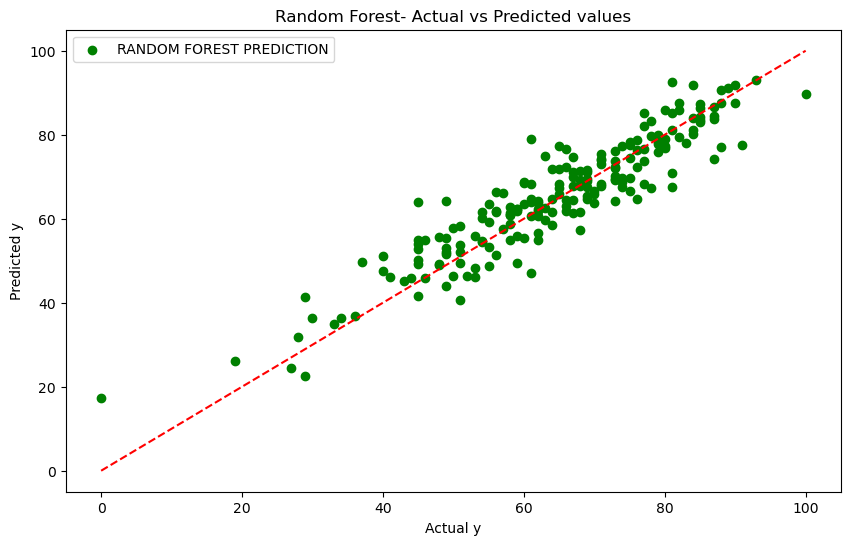

In [132]:
# Plotting actual vs. predicted values of random forest 

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pre_rf, color= 'green', label= 'RANDOM FOREST PREDICTION')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color= 'red', linestyle='--')
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title("Random Forest- Actual vs Predicted values")
plt.legend()
plt.show()